In [22]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

# load data
xgb = pd.read_csv('res_xgboost_bo.csv')
glm = pd.read_csv('res_glmnet_bo.csv')

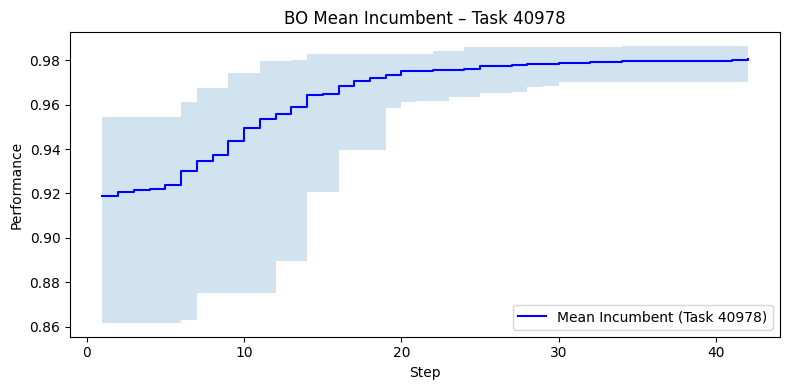

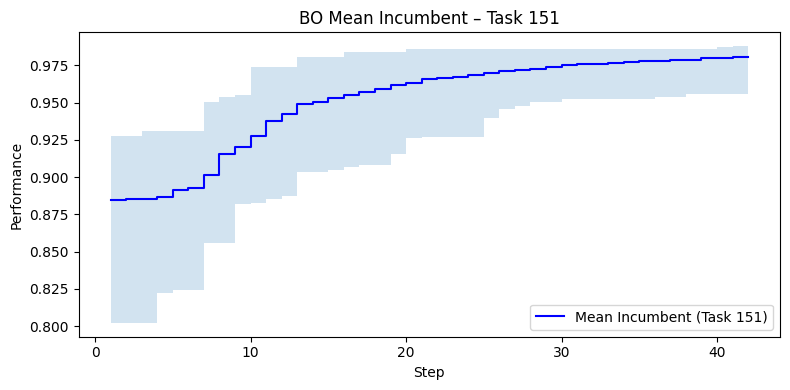

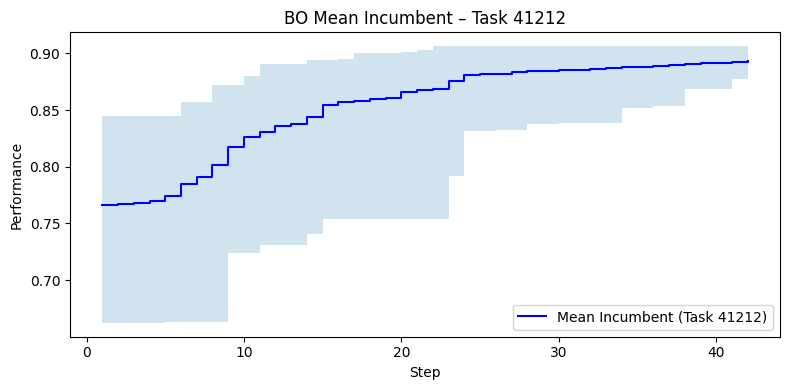

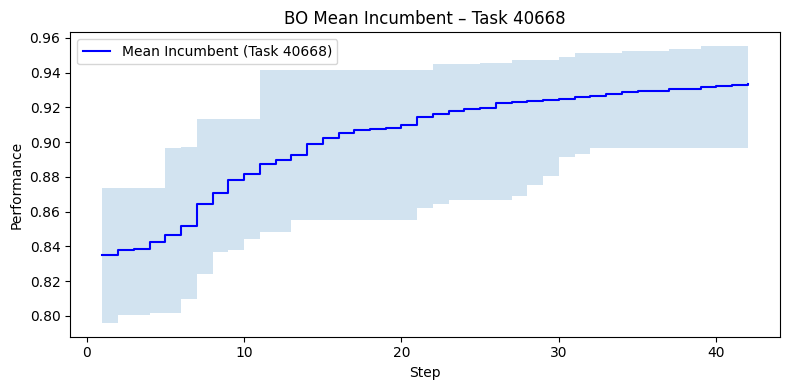

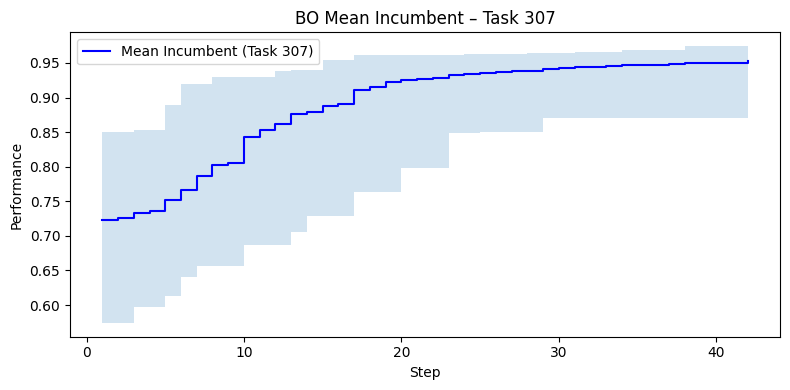

In [31]:
# alle Task-IDs ermitteln
task_ids = [40978, 151, 41212, 40668, 307]

for task in task_ids:

    # --- Filter für Task ---
    viz_df = xgb.loc[(xgb['task_id'] == task) & (xgb['Inner_Iteration'] != 0)]

    # --- Aggregation: mean + std pro Step ---
    agg_df = viz_df.groupby("Inner_Iteration")["Incumbant_Performance"].agg(['mean', 'min', 'max'])

    # --- Daten extrahieren ---
    x = agg_df.index
    y = agg_df['mean']
    min_ = agg_df['min']
    max_ = agg_df['max']

    # --- Plot ---
    plt.figure(figsize=(8, 4))
    
    plt.step(x, y, where="post", label=f"Mean Incumbent (Task {task})", color="blue")
    plt.fill_between(x, min_, max_, alpha=0.2, step="post")

    plt.xlabel("Step")
    plt.ylabel("Performance")
    plt.title(f"BO Mean Incumbent – Task {task}")
    plt.legend()
    plt.tight_layout()

    plt.show()



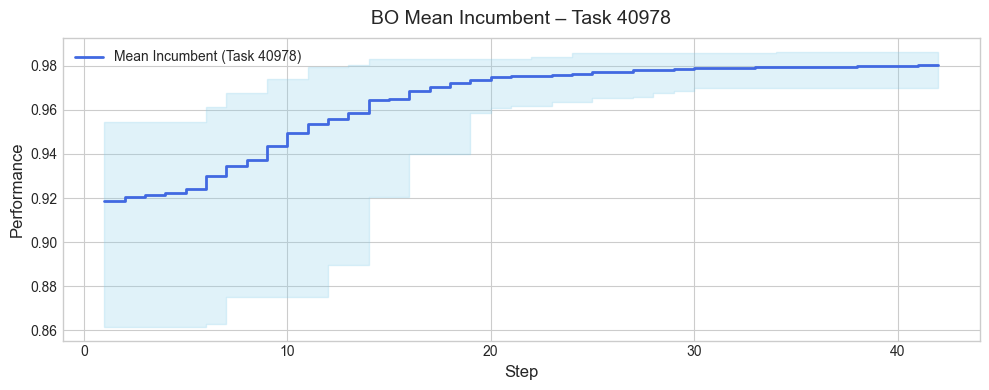

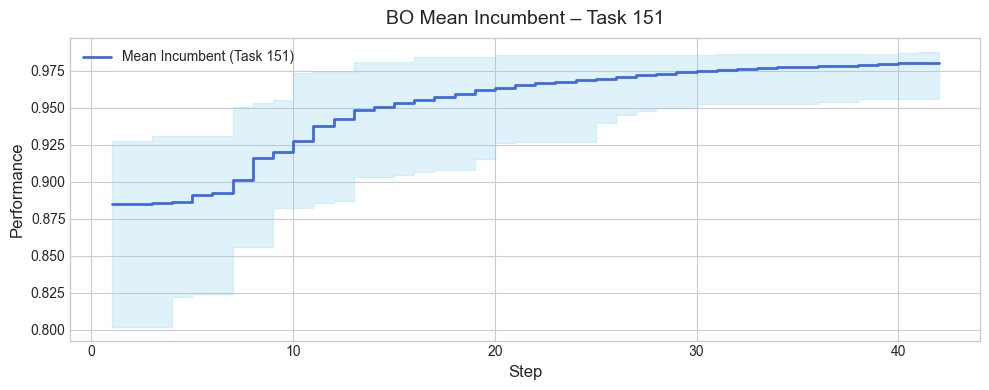

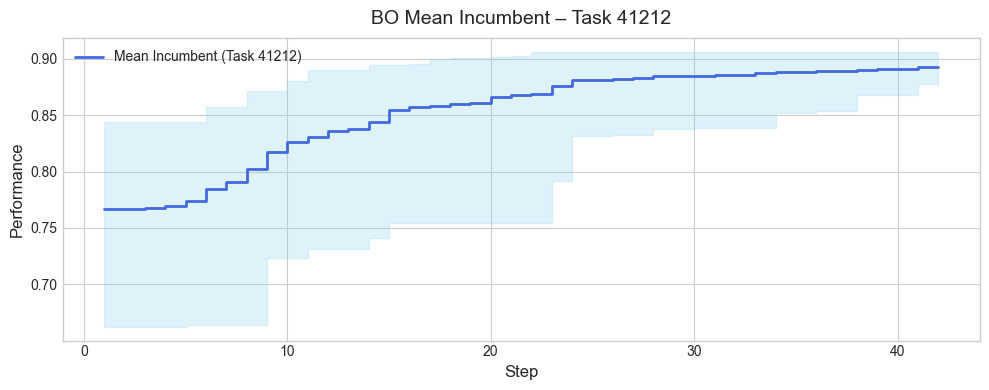

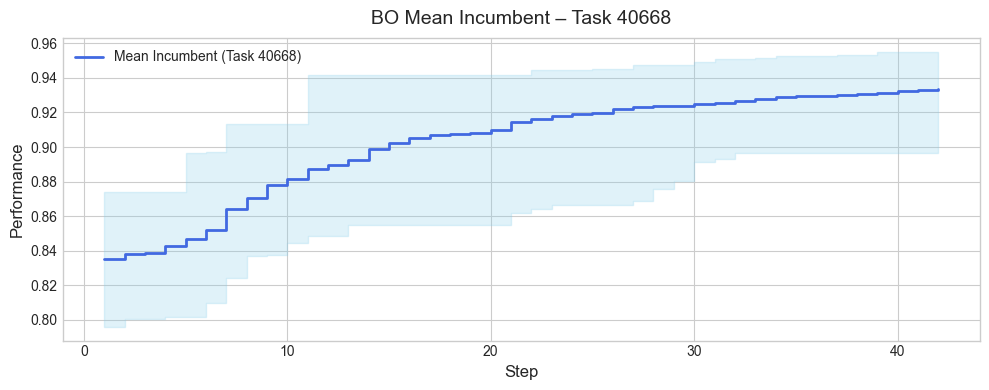

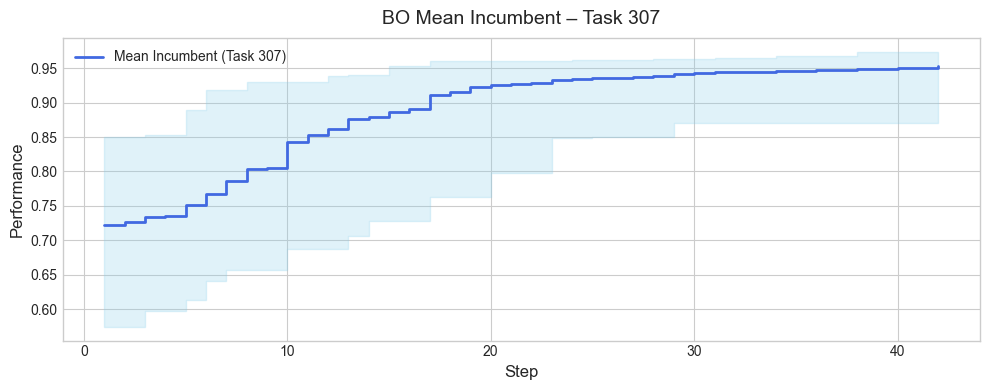

In [ ]:
# plot style
plt.style.use("seaborn-v0_8-whitegrid")

# beatiful tasks
task_ids = [40978, 151, 41212, 40668, 307]

for task in task_ids:

    # filter & aggregate data
    viz_df = xgb.query("task_id == @task and Inner_Iteration != 0")
    agg_df = viz_df.groupby("Inner_Iteration")["Incumbant_Performance"].agg(['mean', 'min', 'max'])

    # prepare data
    x = agg_df.index +1
    y = agg_df['mean']
    ymin = agg_df['min']
    ymax = agg_df['max']

    # plot
    plt.figure(figsize=(10, 4))
    plt.step(x, y, where="post", color="royalblue", linewidth=2,
             label=f"Mean Incumbent (Task {task})")
    plt.fill_between(
        x, ymin, ymax,
        step="post", alpha=0.25, color="skyblue"
    )

    # labels
    plt.xlabel("BO Step", fontsize=12)
    plt.ylabel("Performance", fontsize=12)
    plt.title(f"BO Mean Incumbent – Task {task}", fontsize=14, pad=10)

    plt.legend()
    plt.tight_layout()
    plt.show()
